00 가져온 Data 정보 확인 ========================================================
{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,


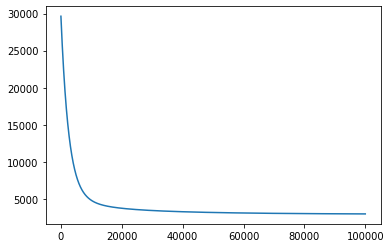

04 Model로 학습한 W및 b값 확인 ====================================================
W :  [  43.71410311 -189.17243831  443.37585008  320.78396813  -29.28493045
  -85.07395245 -202.60568237  119.61331001  370.1758014   150.2196856 ]
b :  153.97954423517734

05 Test data 정답과 예측한값과의 오차를 MSE값으로 확인 ============================
MSE :  2802.0683818698476

06 정답 데이터와 예측한 데이터 시각화 =============================================


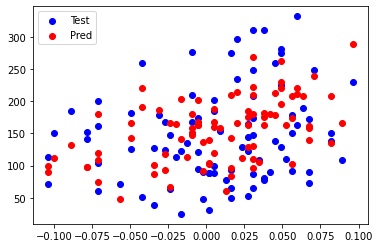

In [19]:
# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print('00 가져온 Data 정보 확인 ========================================================')
print(diabetes)
print()

df_x = diabetes.data
print('df_x shape : ', df_x.shape)
df_y = diabetes.target
print('df_y shape : ', df_y.shape)
print()

# (2) 모델에 입력할 데이터 X 준비하기
import numpy as np

X = np.array(df_x)

# (3) 모델에 예측할 데이터 y 준비하기
y = np.array(df_y)

# (4) train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

print('01 train data 및 test data 정보 확인 =============================================')
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('X_train.shape : ', X_train.shape, ', y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape, ', y_test.shape : ', y_test.shape)
print()

# (5) 모델 준비 및 모델함수 구현하기
W = np.random.rand(10)
b = np.random.rand()
print('02 임의로 선정한 W및 b값 확인 ====================================================')
print('w : ', W)
print('b : ', b)
print()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# (6) 손실함수 loss를 MSE로 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.0001

# (9) 모델 학습하기
losses = []

print('03 Model로 학습한 losses값 확인 및 시각화  ========================================')
for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if (i == 1) or (i % 1000 == 0):
        print('Iteration %d : Loss %0.4f' % (i, L))
        
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

print('04 Model로 학습한 W및 b값 확인 ====================================================')
print('W : ', W)
print('b : ', b)
print()

# (10) test 데이터에 대한 성능 확인하기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('05 Test data 정답과 예측한값과의 오차를 MSE값으로 확인 ============================')
print('MSE : ', mse)
print()

# (11) 정답 데이터와 예측한 데이터 시각화하기
print('06 정답 데이터와 예측한 데이터 시각화 =============================================')
plt.scatter(X_test[:, 0], y_test, c='blue', label='Test')
plt.scatter(X_test[:, 0], prediction, c='red', label='Pred')
plt.legend(loc='upper left')
plt.show()